# Question 1: Read the Bike Details dataset into a Pandas DataFrame and display its first 10 rows.


In [12]:
import pandas as pd
df=pd.read_csv("BIKE DETAILS.csv")
display(df.head(10))

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
5,Honda CB Twister,18000,2010,Individual,1st owner,60000,53857.0
6,Honda CB Hornet 160R,78500,2018,Individual,1st owner,17000,87719.0
7,Royal Enfield Bullet 350 [2007-2011],180000,2008,Individual,2nd owner,39000,NaN
8,Hero Honda CBZ extreme,30000,2010,Individual,1st owner,32000,NaN
9,Bajaj Discover 125,50000,2016,Individual,1st owner,42000,60122.0


# Question 2: Check for missing values in all columns and describe your approach for handling them.


In [21]:
df.isnull().sum()


,0
name,0
selling_price,0
year,0
seller_type,0
owner,0
km_driven,0
ex_showroom_price,435


# Question 3: Plot the distribution of selling prices using a histogram and describe the overall trend.

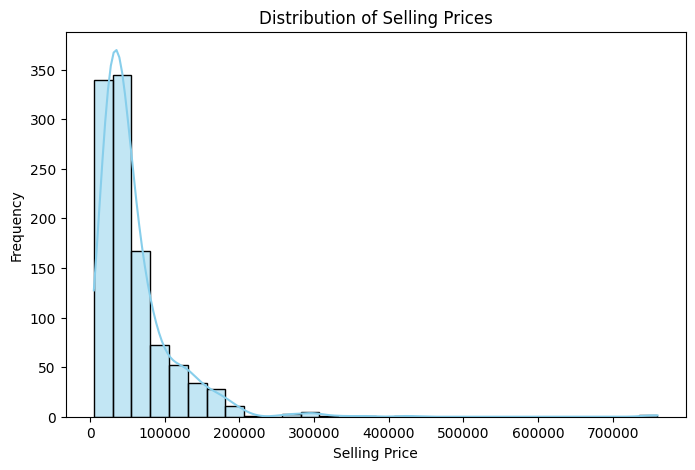

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
# Plot histogram of Selling Price
plt.figure(figsize=(8,5))
sns.histplot(df['selling_price'], bins=30, kde=True, color='skyblue')

plt.title("Distribution of Selling Prices")
plt.xlabel("Selling Price")
plt.ylabel("Frequency")
plt.show()



# Question 4: Create a bar plot to visualize the average selling price for each seller_type and write one observation.


  seller_type  selling_price
0      Dealer   46666.666667
1  Individual   59711.923223


/tmp/ipython-input-59719337.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='seller_type', y='selling_price', data=avg_price, palette='viridis')


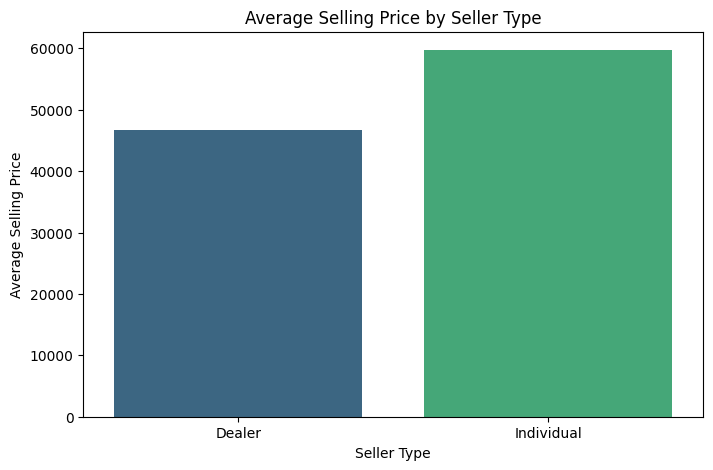

In [15]:
# Calculate average selling price by seller type
avg_price = df.groupby('seller_type')['selling_price'].mean().reset_index()
print(avg_price)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.barplot(x='seller_type', y='selling_price', data=avg_price, palette='viridis')

plt.title("Average Selling Price by Seller Type")
plt.xlabel("Seller Type")
plt.ylabel("Average Selling Price")
plt.show()



# Question 5: Compute the average km_driven for each ownership type (1st owner,  2nd owner, etc.), and present the result as a bar plot.


       owner      km_driven
0  1st owner   32816.583333
1  2nd owner   39288.991870
2  3rd owner   33292.181818
3  4th owner  311500.000000


/tmp/ipython-input-1012525615.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='owner', y='km_driven', data=avg_km, palette='coolwarm')


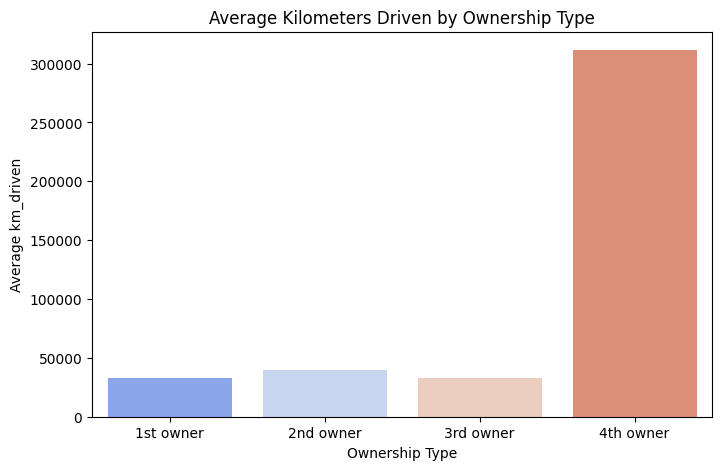

In [16]:
# Calculate average km_driven for each ownership type
avg_km = df.groupby('owner')['km_driven'].mean().reset_index()
print(avg_km)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.barplot(x='owner', y='km_driven', data=avg_km, palette='coolwarm')

plt.title("Average Kilometers Driven by Ownership Type")
plt.xlabel("Ownership Type")
plt.ylabel("Average km_driven")
plt.show()



# Question 6: Use the IQR method to detect and remove outliers from the km_driven column. Show before-and-after summary statistics.


In [17]:
# Summary statistics before removing outliers
print("Before removing outliers:")
print(df['km_driven'].describe())
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)

# Compute IQR
IQR = Q3 - Q1

# Define lower and upper limits
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print(f"Lower Limit: {lower_limit}, Upper Limit: {upper_limit}")
# Filter data to keep only values within the limits
df_no_outliers = df[(df['km_driven'] >= lower_limit) & (df['km_driven'] <= upper_limit)]
print("\nAfter removing outliers:")
print(df_no_outliers['km_driven'].describe())



Before removing outliers:
count      1061.000000
mean      34359.833176
std       51623.152702
min         350.000000
25%       13500.000000
50%       25000.000000
75%       43000.000000
max      880000.000000
Name: km_driven, dtype: float64
Lower Limit: -30750.0, Upper Limit: 87250.0

After removing outliers:
count     1022.000000
mean     28203.415851
std      19552.083583
min        350.000000
25%      13000.000000
50%      24000.000000
75%      40000.000000
max      86000.000000
Name: km_driven, dtype: float64


# Question 7: Create a scatter plot of year vs. selling_price to explore the relationship between a bike's age and its price.

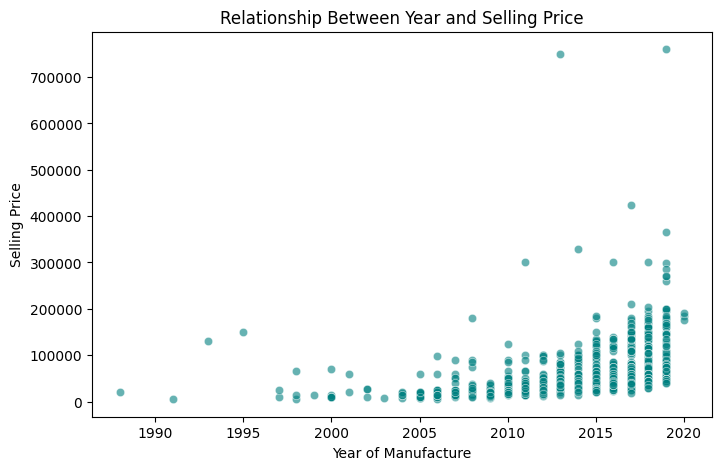

In [18]:

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.scatterplot(x='year', y='selling_price', data=df, color='teal', alpha=0.6)

plt.title("Relationship Between Year and Selling Price")
plt.xlabel("Year of Manufacture")
plt.ylabel("Selling Price")
plt.show()

# Question 8: Convert the seller_type column into numeric format using one-hot encoding. Display the first 5 rows of the resulting DataFrame.

In [19]:
# Apply one-hot encoding to 'seller_type'
df_encoded = pd.get_dummies(df, columns=['seller_type'], drop_first=False)

# Display the first 5 rows
print(df_encoded.head())

                                  name  selling_price  year      owner  \
0            Royal Enfield Classic 350         175000  2019  1st owner   
1                            Honda Dio          45000  2017  1st owner   
2  Royal Enfield Classic Gunmetal Grey         150000  2018  1st owner   
3    Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  1st owner   
4                Yamaha SZ [2013-2014]          20000  2011  2nd owner   

   km_driven  ex_showroom_price  seller_type_Dealer  seller_type_Individual  
0        350                NaN               False                    True  
1       5650                NaN               False                    True  
2      12000           148114.0               False                    True  
3      23000            89643.0               False                    True  
4      21000                NaN               False                    True  


# Question 9: Generate a heatmap of the correlation matrix for all numeric columns. What correlations stand out the most?


                   selling_price      year  km_driven  ex_showroom_price
selling_price           1.000000  0.402188  -0.212937           0.918583
year                    0.402188  1.000000  -0.288675           0.126378
km_driven              -0.212937 -0.288675   1.000000          -0.122011
ex_showroom_price       0.918583  0.126378  -0.122011           1.000000


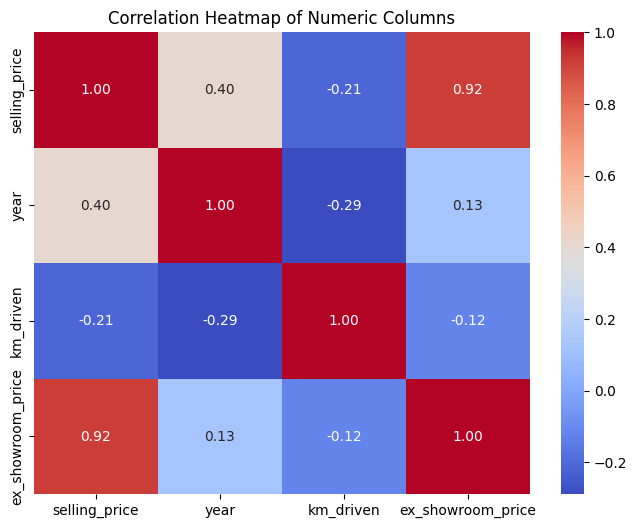

In [20]:
corr_matrix = df.corr(numeric_only=True)
print(corr_matrix)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.title("Correlation Heatmap of Numeric Columns")
plt.show()

# Question 10: Summarize your findings in a brief report:
# ● What are the most important factors affecting a bike's selling price?
# ● Mention any data cleaning or feature engineering you performed.
# answer
Bike Details Dataset — Summary Report

Key Factors Affecting a Bike's Selling Price
Based on the analysis and visualizations:

Year of Manufacture: There is a strong positive correlation between the year and selling price. → Newer bikes tend to sell at higher prices.

Kilometers Driven km_driven: Displays a negative correlation with selling price. → Bikes with higher mileage are usually cheaper, reflecting depreciation due to usage.

Seller Type: Dealers and Trustmark Dealers often list bikes at higher prices than individual sellers, possibly due to better maintenance, certification, or warranty offerings.

Ownership Type: First-owner bikes generally command higher prices than second or third-owner bikes, since fewer ownership transfers imply better condition and trustworthiness.

Other factors if present: Engine capacity, power, and brand reputation may also influence prices but depend on dataset details.

2.Data Cleaning and Feature Engineering Performed

Missing Values: Identified and handled using mean, median, or mode imputation, depending on data type and context.

Outlier Removal IQR Method: Removed extreme outliers from the km_driven column to ensure realistic mileage ranges and reduce skewness.

Encoding Categorical Data: Converted categorical variables like seller_type into numeric format using One-Hot Encoding to make them usable for modeling.

Visualization and Correlation Analysis: Used histograms, scatter plots, bar charts, and heatmaps to detect patterns and relationships among key variables.

3.Overall Insights

The resale value of a bike primarily depends on its age year, usage km_driven, and ownership type.

Seller credibility also influences pricing, with dealers achieving higher average prices.

After cleaning and feature preparation, the dataset is ready for predictive modeling, such as price estimation using regression techniques.